In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning 
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
import sklearn.datasets 
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
df = pd.read_csv("Abalone.csv")

In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
nf = df.select_dtypes(include=[np.number]).columns
cf = df.select_dtypes(include=[np.object]).columns
nf

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [7]:
cf

Index(['Sex'], dtype='object')

In [8]:
skew_list = skew(df[nf],nan_policy='omit') #sending all numericalfeatures and omitting nan values
skew_list_df = pd.concat([pd.DataFrame(nf,columns=['Features']),pd.DataFrame(skew_list,columns=['Skewness'])],axis = 1)

In [9]:
skew_list_df.sort_values(by='Skewness', ascending = False)

,Features,Skewness
2,Height,3.127694
7,Rings,1.113702
4,Shucked weight,0.718840
6,Shell weight,0.620704
5,Viscera weight,0.591640
3,Whole weight,0.530768
1,Diameter,-0.608979
0,Length,-0.639643


In [10]:
mv_df = df.isnull().sum().sort_values(ascending = False)
pmv_df = (mv_df/len(df)) * 100
missing_df = pd.concat([mv_df,pmv_df], axis = 1, keys = ['Missing Values','% Missing'])

In [11]:
missing_df

,Missing Values,% Missing
Rings,0,0.0
Shell weight,0,0.0
Viscera weight,0,0.0
Shucked weight,0,0.0
Whole weight,0,0.0
Height,0,0.0
Diameter,0,0.0
Length,0,0.0
Sex,0,0.0


In [12]:
print(df.Rings.value_counts(normalize = True))

9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
24    0.000479
27    0.000479
1     0.000239
25    0.000239
2     0.000239
26    0.000239
29    0.000239
Name: Rings, dtype: float64


In [13]:
print(len(df.Rings.unique()))

28


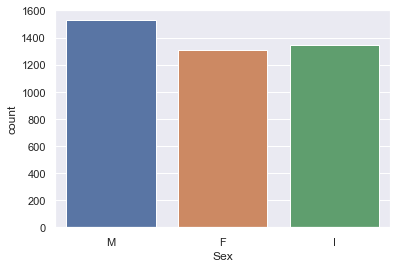

In [14]:
sns.countplot(x='Sex', data = df)

In [15]:
print(df.Sex.value_counts(normalize = True))

M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64


In [16]:
df['Age'] = df['Rings'] + 1.5
df['Age'].head(5)

0    16.5
1     8.5
2    10.5
3    11.5
4     8.5
Name: Age, dtype: float64

In [17]:
df.groupby('Sex')[['Length', 'Diameter', 'Height', 'Whole weight', 
                   'Shucked weight','Viscera weight', 'Shell weight', 'Age']].mean().sort_values(by = 'Age',ascending = False)

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
Sex,,,,,,,,
F,0.579093,0.454732,0.158011,1.046532,0.446188,0.230689,0.302010,12.629304
M,0.561391,0.439287,0.151381,0.991459,0.432946,0.215545,0.281969,12.205497
I,0.427746,0.326494,0.107996,0.431363,0.191035,0.092010,0.128182,9.390462


In [18]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [19]:
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [20]:
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [24]:
result_acc

0.2632342277012328

In [25]:
df['newRings'] = np.where(df['Rings'] > 10,1,0)

In [26]:
Xtrain = df.drop(['newRings','Rings','Age','Sex'], axis = 1)
Ytrain = df['newRings']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [28]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [29]:
result_acc

0.7722987672226251

In [30]:
from sklearn import svm

In [31]:
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [33]:
svmModel = svm.SVC(kernel='linear', C=1, gamma=1) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [34]:
result_acc

0.37128353879622916

In [35]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [36]:
result_acc

0.38143582306018853

In [37]:
new_df = df.copy()

In [38]:
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [39]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [40]:
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [42]:
svmModel = svm.SVC(kernel='rbf', C=1, gamma=100) 

svmModel.fit(X_train, Y_train)

Y_pred = svmModel.predict(X_test)

result_acc = accuracy_score(Y_test,Y_pred) 

In [43]:
result_acc

0.9840464104423495